## Battle for popularity

I explored the movie popularity trend over years, from 1930 to 2020. I computed the mean of popularity in each year, and then plotted line chart to show the trend. Moreover, since the popularity has no upper bound, in case the mean of popularity was affected by the higher rating, I also computed the median for analyzing this question.

**Goal:** explore the possibilities of one of the tables, check the possibility of building graphs in the study of statistical greatness, check API opportunity.

In [2]:
#import libraries for work
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#connect to the created Database
conn = sqlite3.connect("movies_database.sqlite")
cur = conn.cursor()

In [4]:
for row in cur.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('tmdb_movies',)
('imdb_title_crew',)
('tn_movie_budgets',)
('imdb_title_ratings',)
('imdb_name_basics',)
('imdb_title_akas',)
('bom_movie_gross',)
('imdb_title_basics',)
('rt_reviews',)


In [5]:
# Quick look at the tables from my database
movies = pd.read_sql(f"select * from tmdb_movies", conn)
movies.head()

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
#divide data in a column release_date
movies['year'] = movies.release_date.str.slice(0,4).astype(int)
movies['month'] = movies.release_date.str.slice(5,7).astype(int)
movies['day'] = movies.release_date.str.slice(8,10).astype(int)

movies.head()

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month,day
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,19
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3,26
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5,7
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11,22
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7,16


In [8]:
mean_ratings = movies.groupby(['year'], as_index=False)['popularity'].aggregate(np.mean)
mean_ratings

,year,popularity
0,1930,9.583000
1,1933,2.292000
2,1936,1.653000
3,1939,0.600000
4,1946,9.647000
...,...,...
61,2016,3.059306
62,2017,3.378439
63,2018,4.875964
64,2019,6.412000


In [30]:
median_ratings = movies.groupby(['year'], as_index=False)['popularity'].aggregate(np.median)
median_ratings

,year,popularity
0,1930,9.583
1,1933,2.292
2,1936,1.653
3,1939,0.600
4,1946,9.647
...,...,...
61,2016,1.243
62,2017,1.400
63,2018,2.547
64,2019,5.385


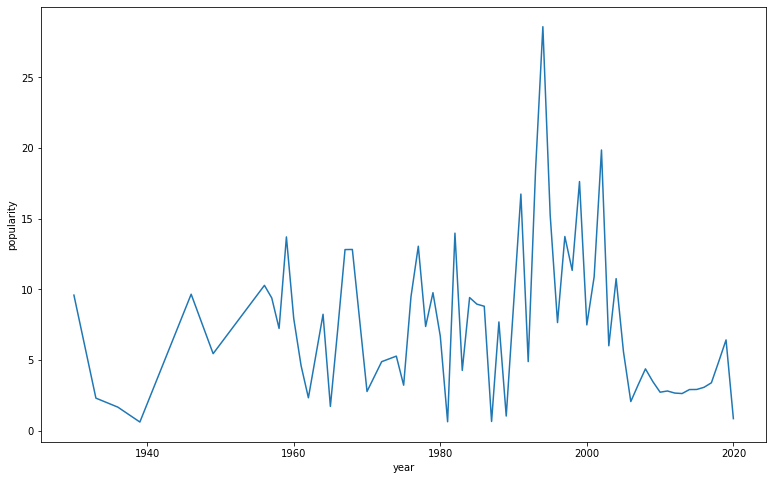

In [26]:
plt.figure(figsize=(13, 8))
sns.lineplot(x='year', y='popularity', data=mean_ratings)
plt.show()

# How day and month affects popularity?

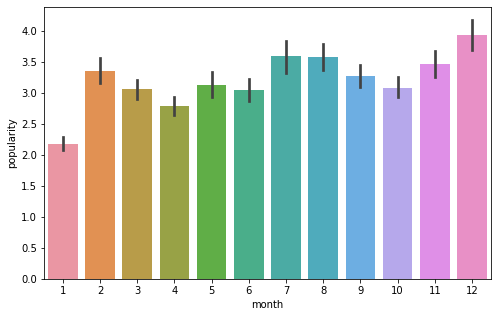

In [16]:
# let's see in which month released most popular movies
plt.figure(figsize=(8, 5))
sns.barplot(x='month', y='popularity', data=movies)
plt.show()

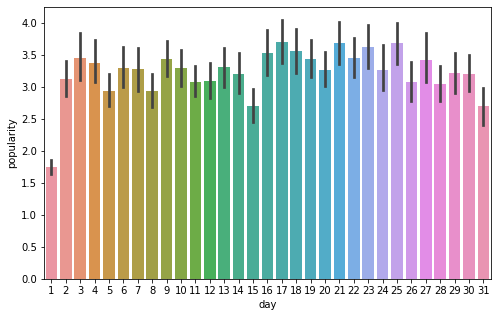

In [23]:
# let's see in which day released most popular movies
plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='popularity', data=movies)
plt.show()

By date it's can't give us any imformation. Let's convert then into day of week.

In [20]:
# check type
movies['release_date'].dtype

dtype('O')

In [21]:
# Convert to datetime object
movies['release_date'] = pd.to_datetime(movies['release_date']) 
movies['release_date'].dtype

dtype('<M8[ns]')

In [22]:
movies['day_of_week'] = movies['release_date'].map(lambda x: x.weekday())
movies.head()

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month,day,day_of_week
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,19,4
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3,26,4
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5,7,4
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11,22,2
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7,16,4


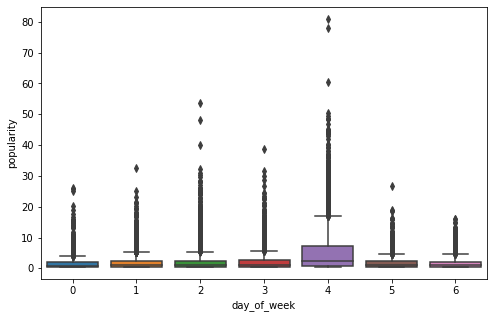

In [25]:
# let's see in which day of week released most popular movies
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_week', y='popularity', data=movies)
plt.show()

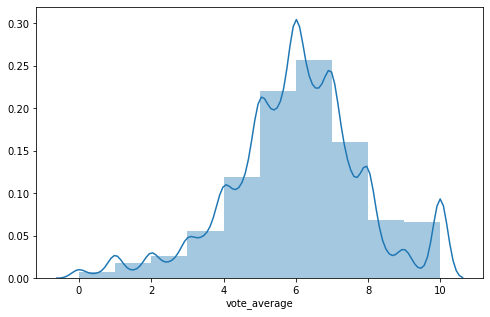

In [14]:
# Let's see vote_average on the plot
plt.figure(figsize=(8, 5))
sns.distplot(movies['vote_average'], bins = 10)
plt.show()

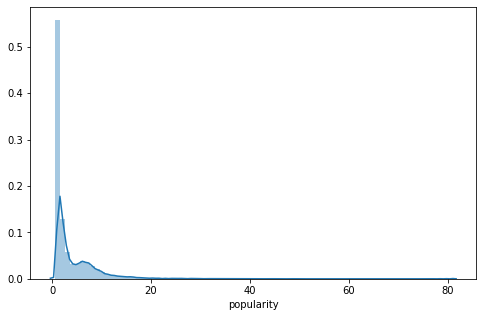

In [27]:
plt.figure(figsize=(8, 5))
sns.distplot(movies['popularity'], bins = 80)
plt.show()

In [17]:
#Let’s see some descriptive statistics for the data set. 
movies.describe()

,index,id,popularity,vote_average,vote_count,year,month,day
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837,2013.953162,6.405966,14.489422
std,7654.94288,153661.615648,4.355229,1.852946,960.961095,3.544641,3.573796,9.080751
min,0.00000,27.000000,0.600000,0.000000,1.000000,1930.000000,1.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000,2012.000000,3.000000,7.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000,2014.000000,6.000000,14.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000,2016.000000,10.000000,22.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000,2020.000000,12.000000,31.000000
